In [ ]:
!pip install openeo

In [ ]:
import openeo
connection = openeo.connect("openeo.dataspace.copernicus.eu")

In [ ]:
connection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2020_V1',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST',
 'SENTINEL1_GLOBAL_MOSAICS']

In [ ]:
connection.describe_collection("SENTINEL2_L2A")

In [ ]:
connection.list_processes()

In [ ]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [ ]:
# Define spatial extent for a small area in Tehran
spatial_extent = {
    "west": 51.325,
    "south": 35.615,
    "east": 51.420,
    "north": 35.700,
}

# Load the desired collection (e.g., Sentinel-2 L2A)
datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=spatial_extent,
    temporal_extent=["2021-02-01", "2021-04-30"],
    bands=["B02", "B04", "B08"],
    max_cloud_cover=85,
)

# Now you can proceed to calculate EVI as before
blue = datacube.band("B02") * 0.0001
red = datacube.band("B04") * 0.0001
nir = datacube.band("B08") * 0.0001

# Calculate EVI
evi_cube = 2.5 * (nir - red) / (nir + 6.0 * red - 7.5 * blue + 1.0)

# Mask and composite as before...


In [ ]:
job = datacube.execute_batch()

0:00:00 Job 'j-2410089893174c0c9f48279abc228d57': send 'start'
0:00:13 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:00:19 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:00:25 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:00:33 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:00:43 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:00:56 Job 'j-2410089893174c0c9f48279abc228d57': created (progress 0%)
0:01:11 Job 'j-2410089893174c0c9f48279abc228d57': running (progress N/A)
0:01:31 Job 'j-2410089893174c0c9f48279abc228d57': running (progress N/A)
0:01:55 Job 'j-2410089893174c0c9f48279abc228d57': running (progress N/A)
0:02:25 Job 'j-2410089893174c0c9f48279abc228d57': finished (progress 100%)


In [ ]:
# Step 3: Download the bands as GeoTIFF files
# You can loop through the bands you want to download
for band in ["B02", "B04", "B08"]:
    band_data = datacube.band(band)

    # Download each band
    band_data.download(f"{band}_tehran.tif")

In [ ]:
evi_composite = evi_cube.max_time()
evi_composite.download("evi-compositeTeh.tiff")

In [ ]:
!pip install rasterio

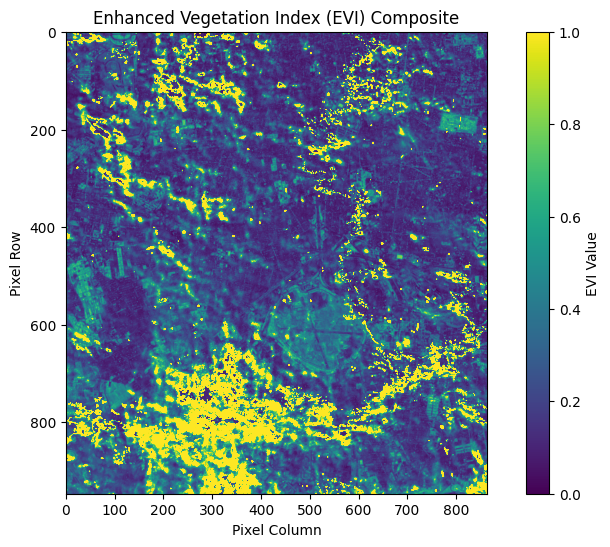

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Load the EVI composite GeoTIFF file
with rasterio.open("/content/evi-compositeTeh.tiff") as src:
    evi_data = src.read(1)  # Read the first band
    evi_meta = src.meta      # Get metadata for reference

# Plotting the EVI composite data
plt.figure(figsize=(10, 6))
plt.imshow(evi_data, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='EVI Value')
plt.title('Enhanced Vegetation Index (EVI) Composite')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()


# S3 Data

In [ ]:
connection.describe_collection("SENTINEL3_OLCI_L1B")

In [ ]:
# Define spatial extent for Tehran
spatial_extent = {
    "west": 51.325,
    "south": 35.065,
    "east": 51.959,
    "north": 35.7
}

# Load Sentinel-3 OLCI data
olci_datacube = connection.load_collection(
    "SENTINEL3_OLCI_L1B",
    spatial_extent=spatial_extent,
    temporal_extent=["2021-02-01", "2021-02-28"],
    bands=["B04", "B06", "B08"]  # Specify the bands you want to download
)


# Execute the download with the evalscript
olci_datacube.download("sentinel3_olci_tehran_bands_4_6_8.tif")


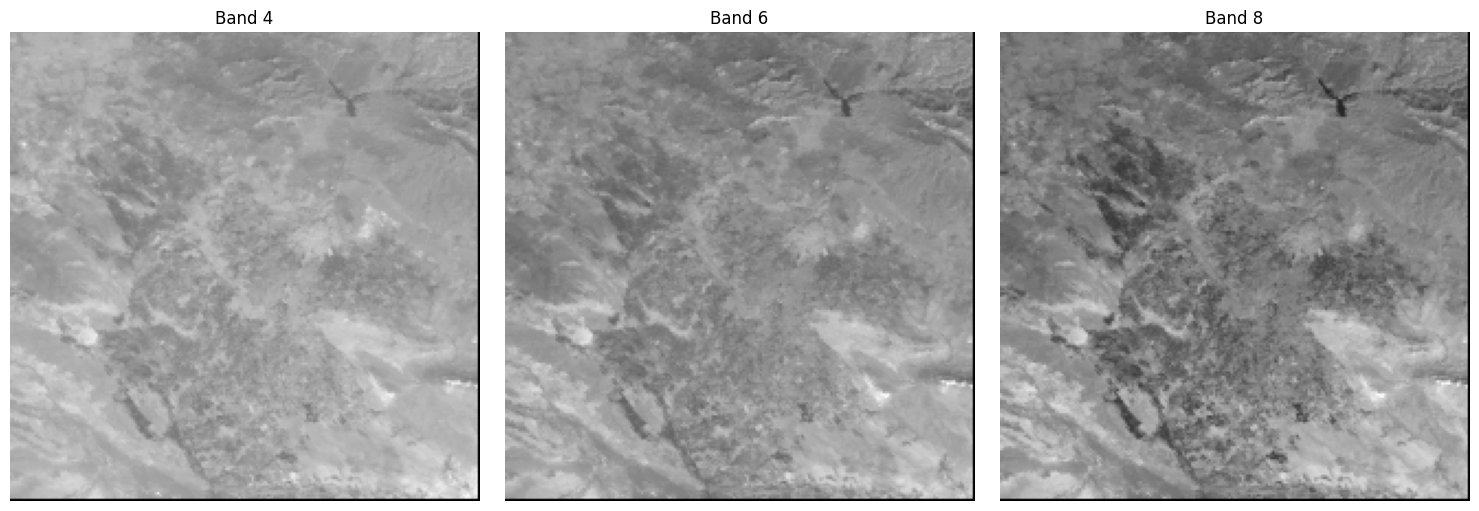

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Path to the downloaded TIFF file
file_path = "sentinel3_olci_tehran_bands_4_6_8.tif"

# Open the TIFF file using rasterio
with rasterio.open(file_path) as src:
    # Read the specific bands (4, 6, 8)
    band4 = src.read(1)  # Band 4
    band6 = src.read(2)  # Band 6
    band8 = src.read(3)  # Band 8

# Create a figure to display the bands
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each band
axes[0].imshow(band4, cmap='gray')
axes[0].set_title('Band 4')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(band6, cmap='gray')
axes[1].set_title('Band 6')
axes[1].axis('off')  # Turn off axis

axes[2].imshow(band8, cmap='gray')
axes[2].set_title('Band 8')
axes[2].axis('off')  # Turn off axis

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

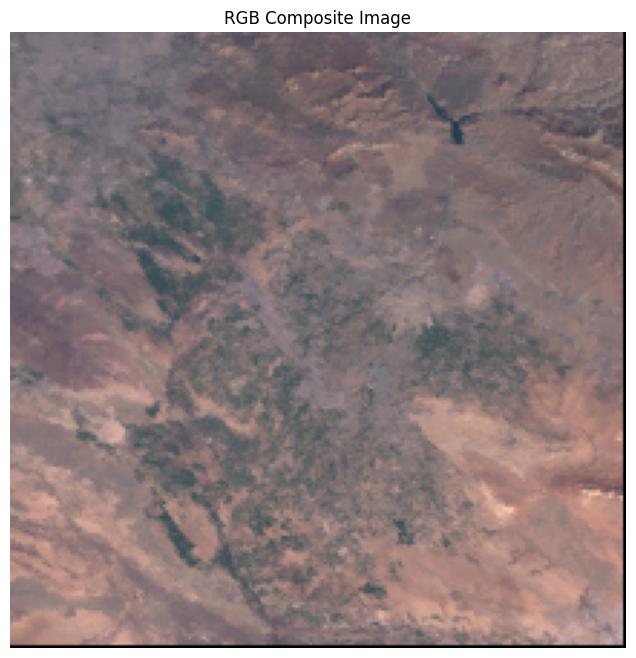

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Path to the downloaded TIFF file
file_path = "sentinel3_olci_tehran_bands_4_6_8.tif"

# Open the TIFF file using rasterio
with rasterio.open(file_path) as src:
    # Read the specific bands (4, 6, 8)
    band4 = src.read(1)  # Band 4 (Red)
    band6 = src.read(2)  # Band 6 (Green)
    band8 = src.read(3)  # Band 8 (Blue)

# Stack the bands to create an RGB image
rgb_image = np.dstack((band8, band6, band4))

# Normalize the RGB values to range [0, 1] for display
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Create a figure to display the RGB composite
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title('RGB Composite Image')
plt.axis('off')  # Turn off axis
plt.show()
